# Завдання 1  
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.
# Завдання 2

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

## Sum of squared errors

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [13]:
def sse(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    sse = []
    k_range = range(1, 11)
    for k in k_range:
        k_means = KMeans(n_clusters=k)
        k_means.fit(data_scaled)
        sse.append(k_means.inertia_)
    return sse, k_range, data_scaled

## Elbow method

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def elbow_method(k_range, sse):
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Numbers of klusters')
    plt.ylabel('Sum of Squared Errors (sse)')
    plt.title('Elbow Method for Optinal Number of Clusters')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

## K-mean

In [26]:
def k_means_algorithm(k_optional, data_scaled):
    k_means = KMeans(n_clusters=k_optional)
    k_means.fit(data_scaled)
    return k_means

## Vizualize the result

In [22]:
def k_means_result(k_means, data, k_optional):
    data['cluster'] = k_means.labels_

    plt.figure(figsize=(5, 8))
    sns.scatterplot(data=data, x=1, y=2, hue='cluster')
    plt.title(f'K-Mean Clustering with {k_optional} Clusters')
    plt.show()

## 2d

In [4]:
import pandas as pd

data_2d = pd.read_csv("data_2d.csv", header=None).iloc[:, 1:]
data_2d.head()

,1,2
0,-0.768716,0.460860
1,2.687848,2.366961
2,-0.201379,0.470430
3,0.608496,1.225400
4,-0.082282,1.137218


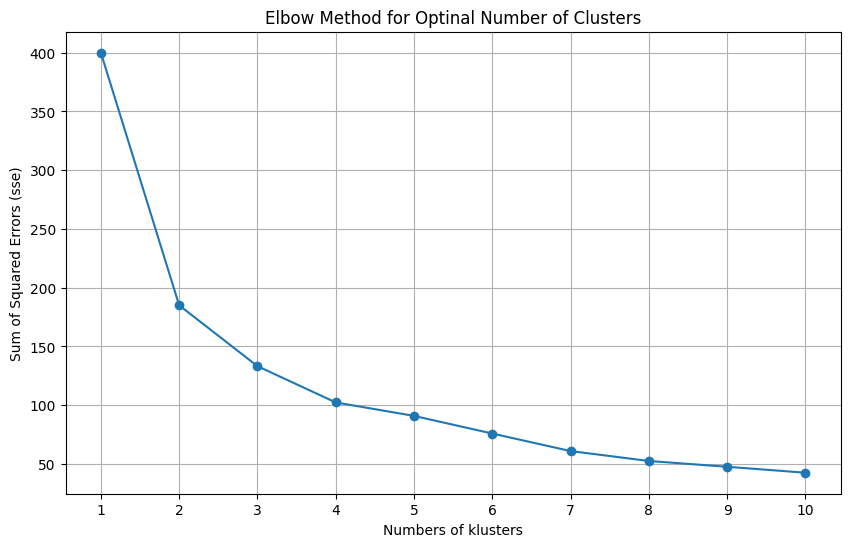

In [16]:
data_2d_sse, k_range, data_scaled = sse(data_2d)
elbow_method(k_range, data_2d_sse)

In [27]:
k_optional = 2
k_means_data = k_means_algorithm(k_optional, data_scaled)

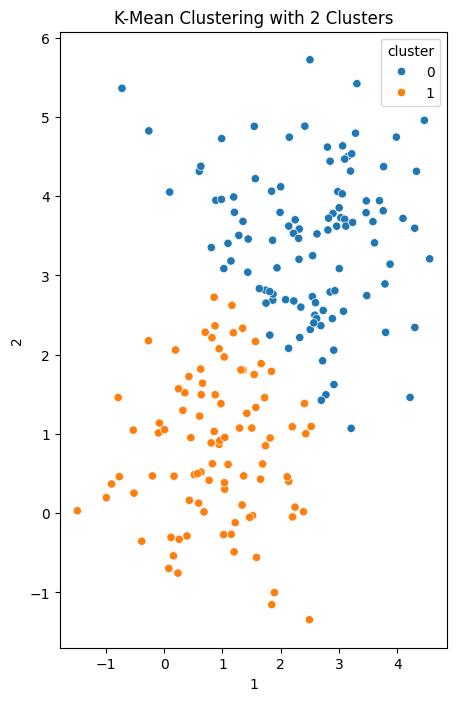

In [28]:
k_means_result(k_means_data, data_2d, k_optional)

## mnist

In [30]:
mnist = pd.read_csv("mnist.csv")
mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(mnist)
principal_mnist = pd.DataFrame(data=principal_components, columns = [1, 2])

principal_mnist

,1,2
0,-75.853084,-1043.505483
1,-969.408225,-344.775346
2,1054.121664,-358.705767
3,420.940806,671.084661
4,-1002.830009,-302.511603
...,...,...
494,1104.167650,-247.809222
495,91.008688,817.055977
496,-500.898870,283.055958
497,426.621192,-45.499548


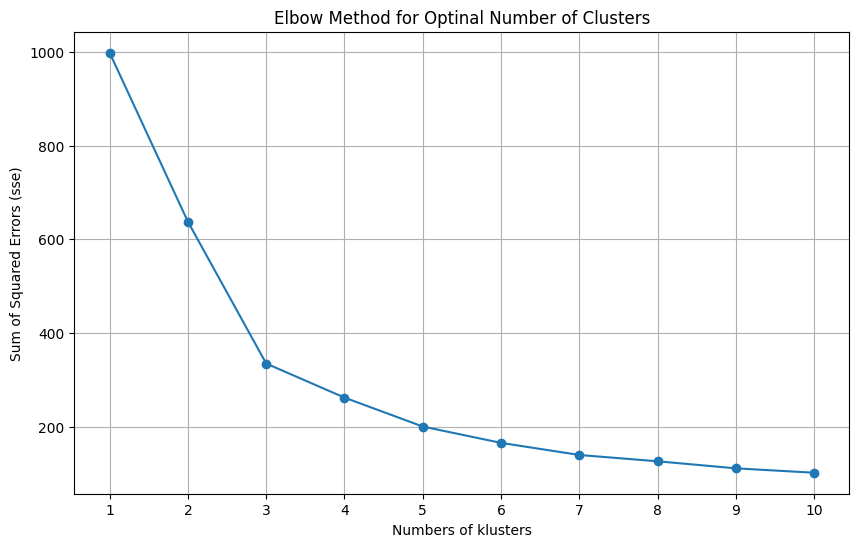

In [42]:
mnist_sse, k_range, mnist_scaled = sse(principal_mnist)
elbow_method(k_range, mnist_sse)

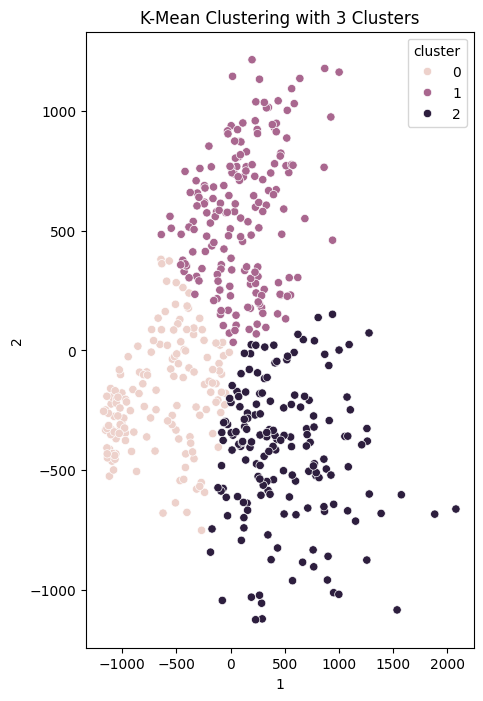

In [43]:
k_optional = 3
k_means_mnist = k_means_algorithm(k_optional, mnist_scaled)
k_means_result(k_means_mnist, principal_mnist, k_optional)